# Answer9

In [1]:
#load the data set
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
#Examine its dimensions:
print("The dimension of Data set is:",df.shape)
rows, columns = df.shape

# Print the number of rows and columns
print(f"The dataset has {rows} rows and {columns} columns.")

The dimension of Data set is: (10841, 13)
The dataset has 10841 rows and 13 columns.


# Answer10

To analyze how the ratings of apps vary by category and create a boxplot to compare the ratings of different app categories, you can use the Seaborn and Matplotlib libraries in Python.

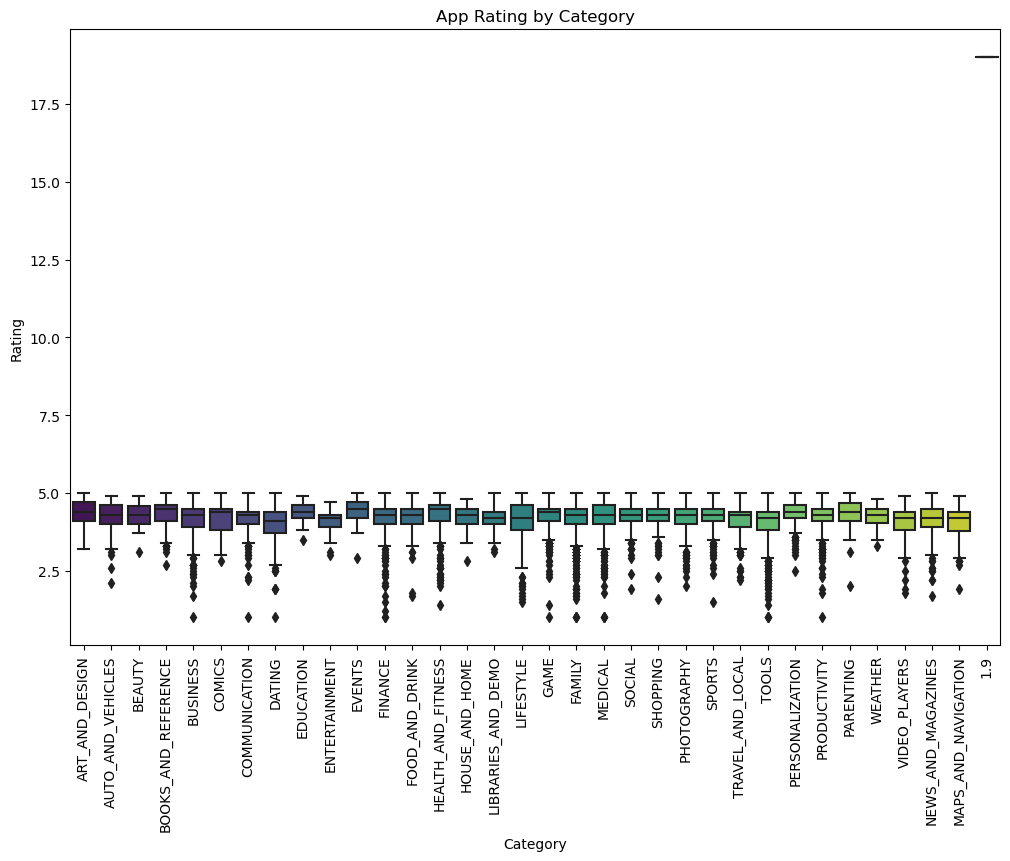

In [3]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Category',y='Rating',data=df,palette='viridis')
plt.title('App Rating by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation= 90)
plt.show()

# Answer11

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values and the corresponding counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64


The impact of missing values on your analysis depends on the extent of the missing data and the nature of your analysis. Here are some general considerations:

1-Data Completeness: Missing values can reduce the completeness of your dataset. If a significant portion of data is missing for a particular variable, it may impact the reliability of any analysis involving that variable.

2-Imputation: Depending on the analysis, you might need to handle missing values through imputation techniques (e.g., filling missing values with the mean, median, or mode). However, imputation introduces assumptions and may affect the distribution of the data.

3-Bias: If the missing data is not random, it may introduce bias into your analysis. For example, if app ratings are missing for a specific category or developer, it could bias your analysis of ratings by category or developer.

4-Data Exploration: Before imputing or dropping missing values, it's important to understand the reasons for missing data. Exploratory data analysis can help identify patterns or reasons for missing values.

# Answer11

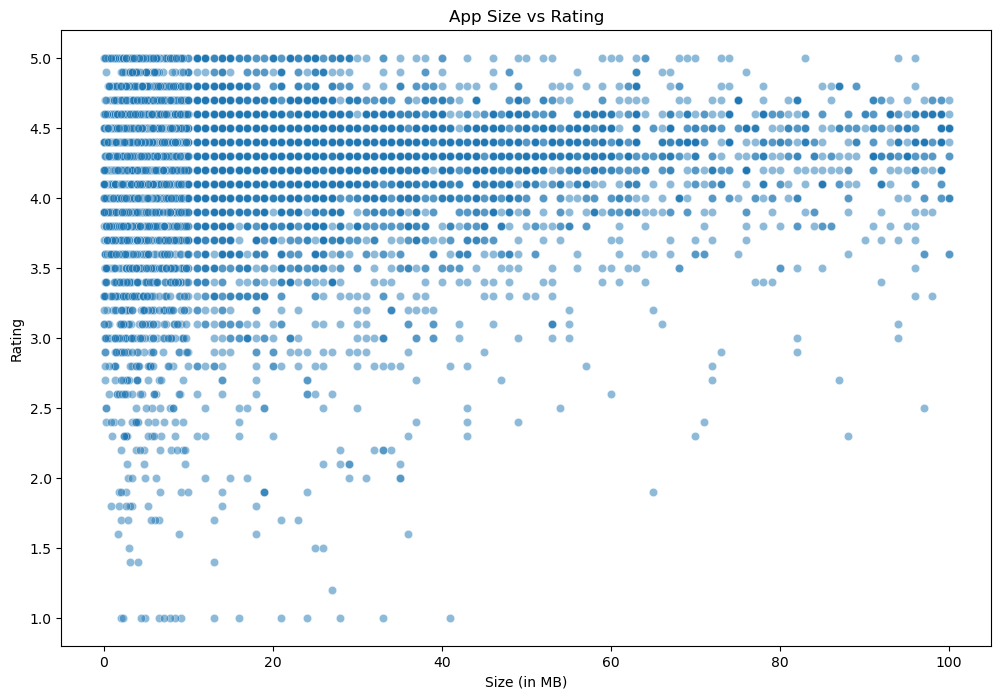

In [5]:
# Drop rows with missing values in 'Rating' or 'Size' columns for clarity in the plot
df = df.dropna(subset=['Rating', 'Size'])

# Convert 'Size' column to numeric by removing 'M' and 'k' and converting to bytes
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else str(x).replace('k', '') + 'e-3')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Size', y='Rating', data=df, alpha=0.5)
plt.title('App Size vs Rating')
plt.xlabel('Size (in MB)')
plt.ylabel('Rating')
plt.show()

# Answer12

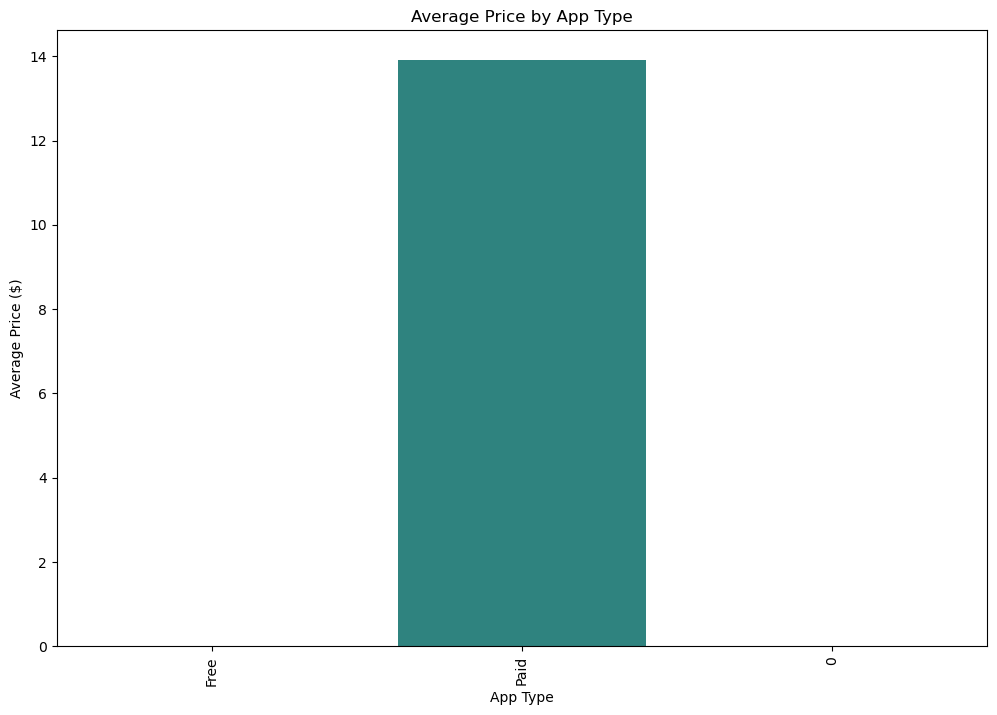

In [12]:
#load the data set
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Drop rows with missing values in 'Price' column for clarity in the plot
df = df.dropna(subset=['Price'])

# Convert 'Price' column to numeric by removing the dollar sign
df['Price'] = df['Price'].apply(lambda x: float(x[1:]) if '$' in str(x) else 0)

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Type', y='Price', data=df,errorbar= None, estimator='mean', palette='viridis')
plt.title('Average Price by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()

# Answer14

In [14]:
category = pd.DataFrame(df['Category'].value_counts())
category.rename(columns = {'Category' : 'Count'},inplace =True)

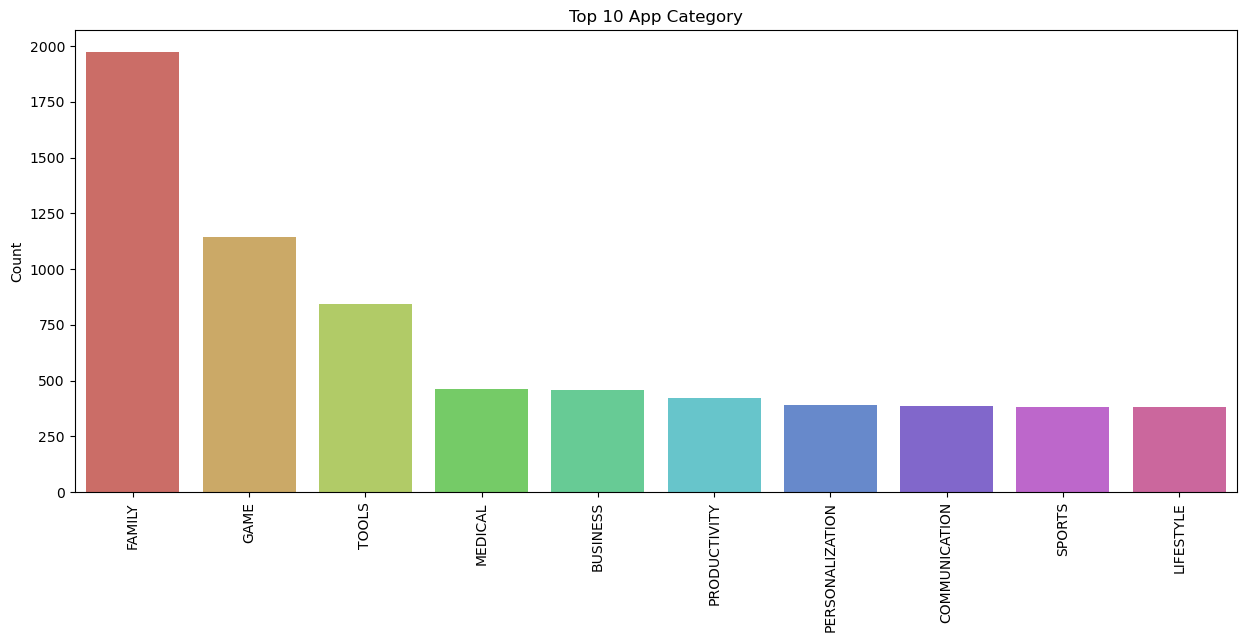

In [15]:
#top 10 apps:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10],y='Count',data=category[:10],palette='hls')
plt.title("Top 10 App Category")
plt.xticks(rotation=90)
plt.show()

# Answer15

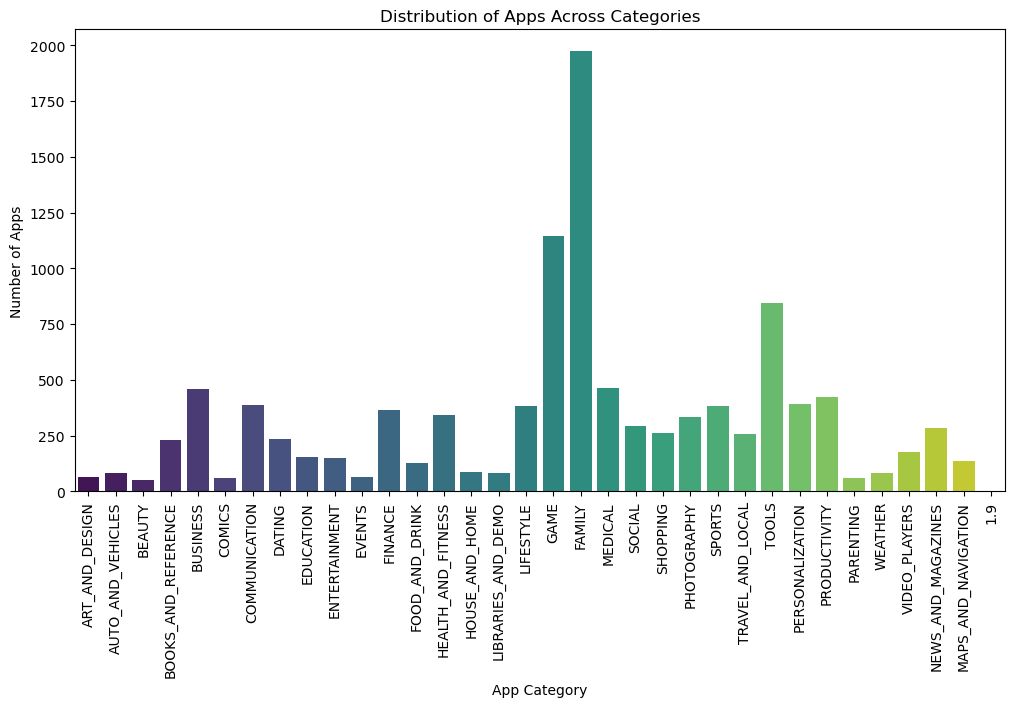

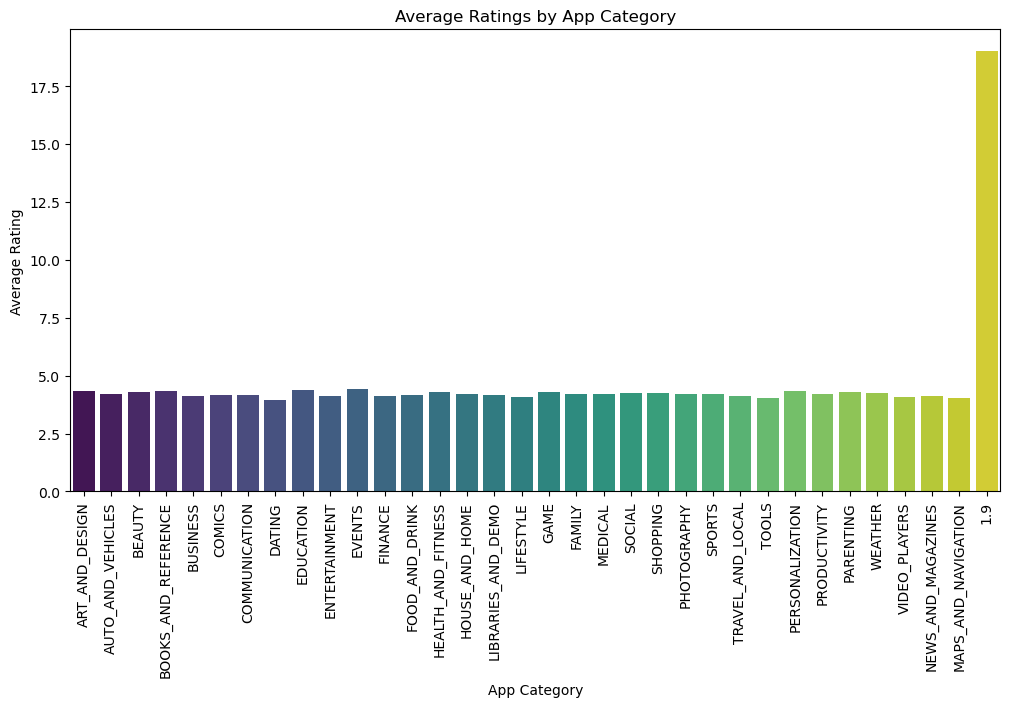

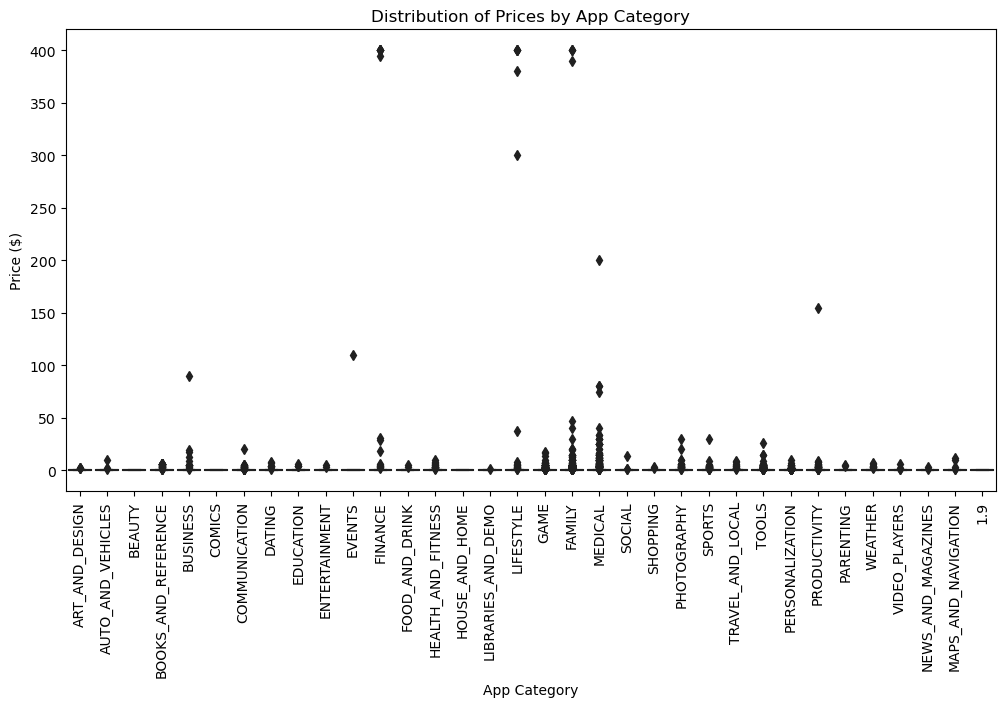

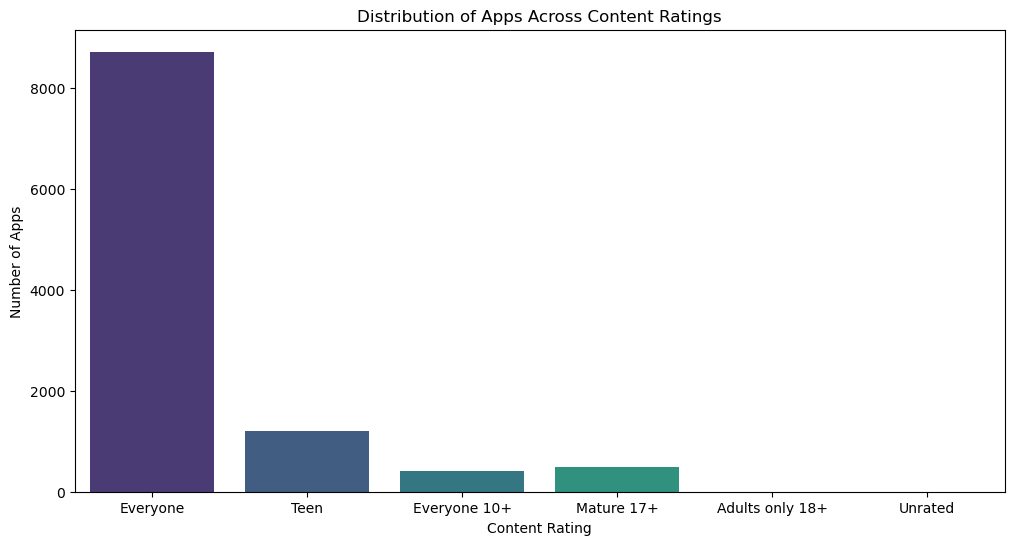

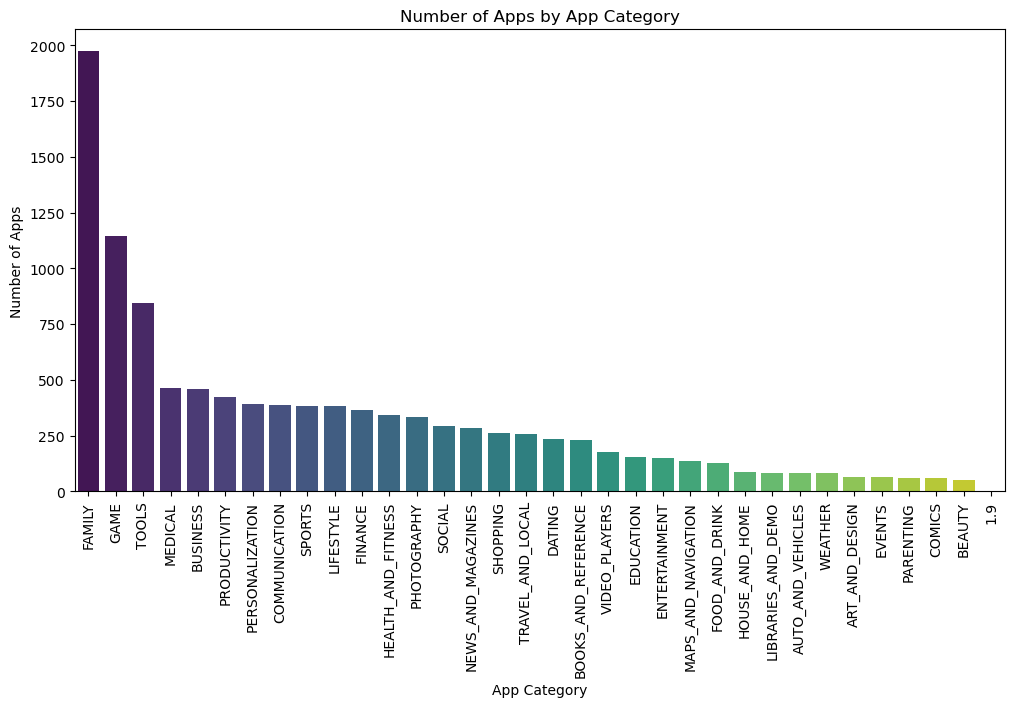

/tmp/ipykernel_1669/2577454924.py:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['Rating', 'Installs', 'Reviews', 'Price']].corr()


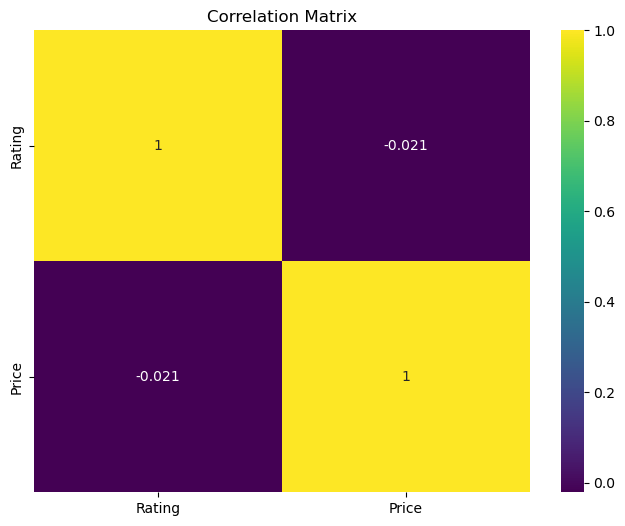

In [34]:
# Explore App Categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Distribution of Apps Across Categories')
plt.xlabel('App Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

# Analyze Ratings
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Rating', data=df, errorbar=None, estimator='mean', palette='viridis')
plt.title('Average Ratings by App Category')
plt.xlabel('App Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

# Pricing Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=df, palette='viridis')
plt.title('Distribution of Prices by App Category')
plt.xlabel('App Category')
plt.ylabel('Price ($)')
plt.xticks(rotation=90)
plt.show()

# User Preferences
plt.figure(figsize=(12, 6))
sns.countplot(x='Content Rating', data=df, palette='viridis')
plt.title('Distribution of Apps Across Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.show()

# Competition Analysis
competition_by_category = df['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=competition_by_category.index, y=competition_by_category.values, palette='viridis')
plt.title('Number of Apps by App Category')
plt.xlabel('App Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

# Correlation Analysis
correlation_matrix = df[['Rating', 'Installs', 'Reviews', 'Price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()


# Answer16

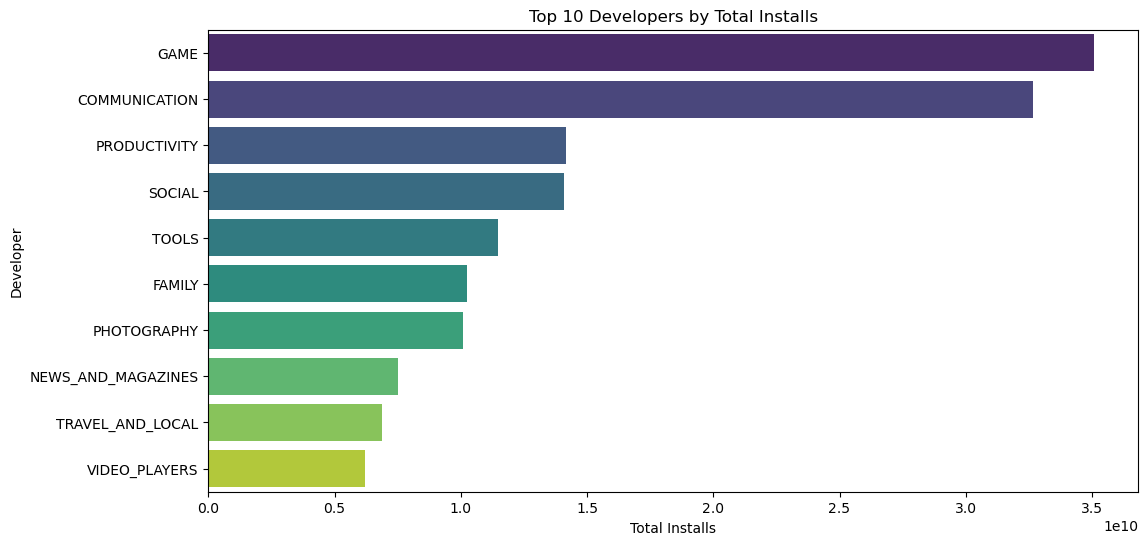

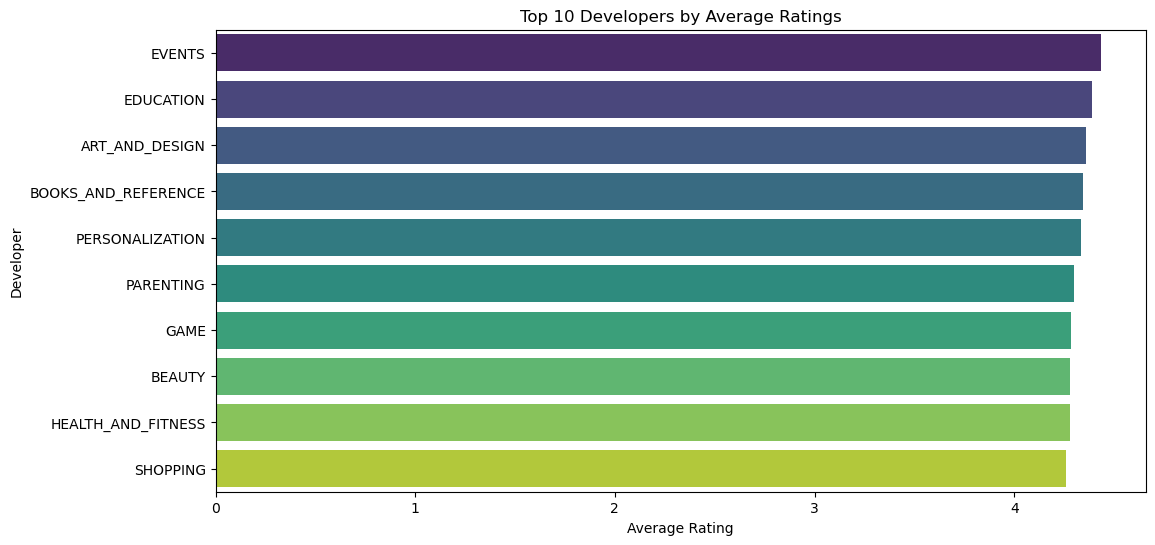

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
df = pd.read_csv(url)

# Data Cleaning
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '').replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')  # Convert to numeric, handling errors

# Filter out rows with non-numeric 'Installs'
df = df.dropna(subset=['Installs'])

# Identify the appropriate column for 'Developer'
developer_column = 'Category' 

# Analyze Number of Installs by Developer
installs_by_developer = df.groupby(developer_column)['Installs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=installs_by_developer.values, y=installs_by_developer.index, palette='viridis')
plt.title('Top 10 Developers by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('Developer')
plt.show()


# Analyze Average Ratings by Developer
average_ratings_by_developer = df.groupby(developer_column)['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_ratings_by_developer.values, y=average_ratings_by_developer.index, palette='viridis')
plt.title('Top 10 Developers by Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Developer')
plt.show()

# Answer17

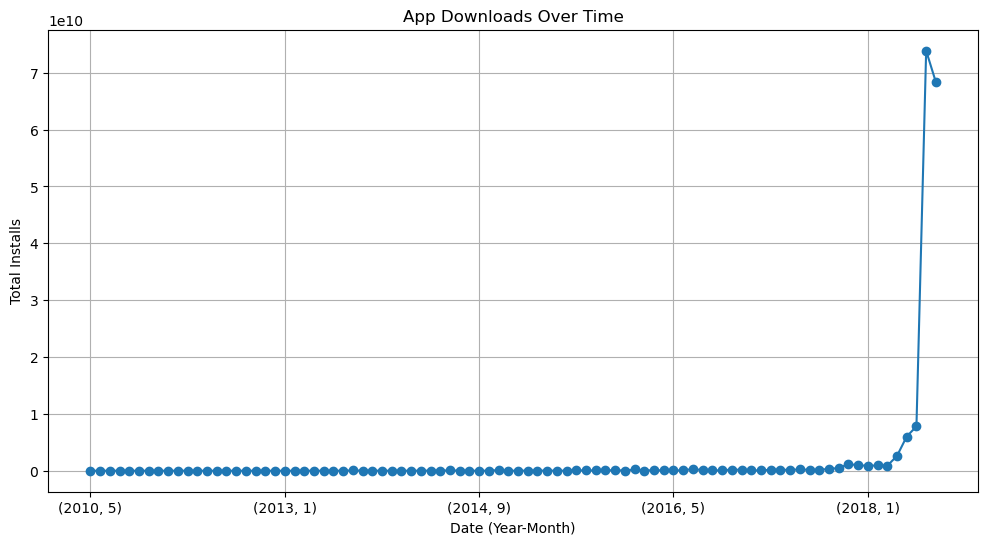

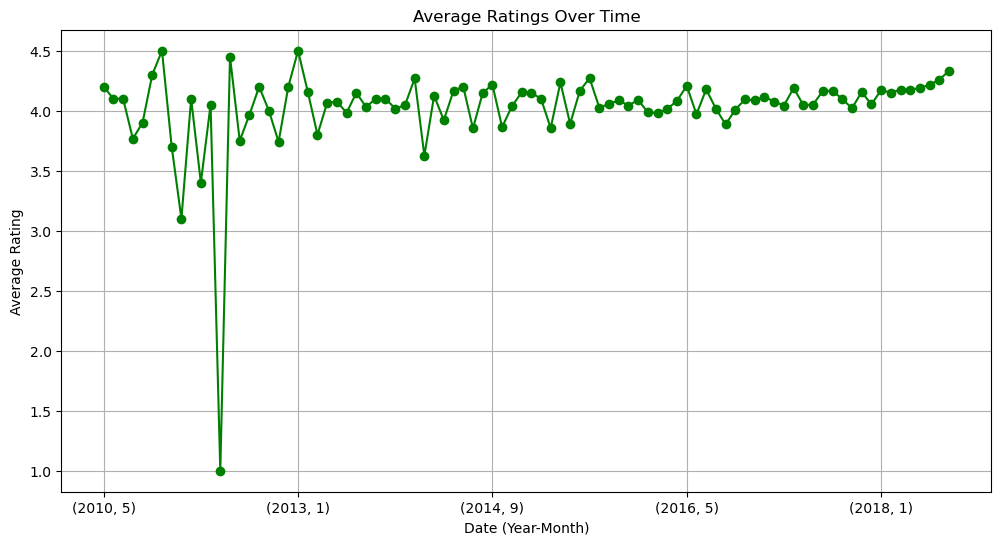

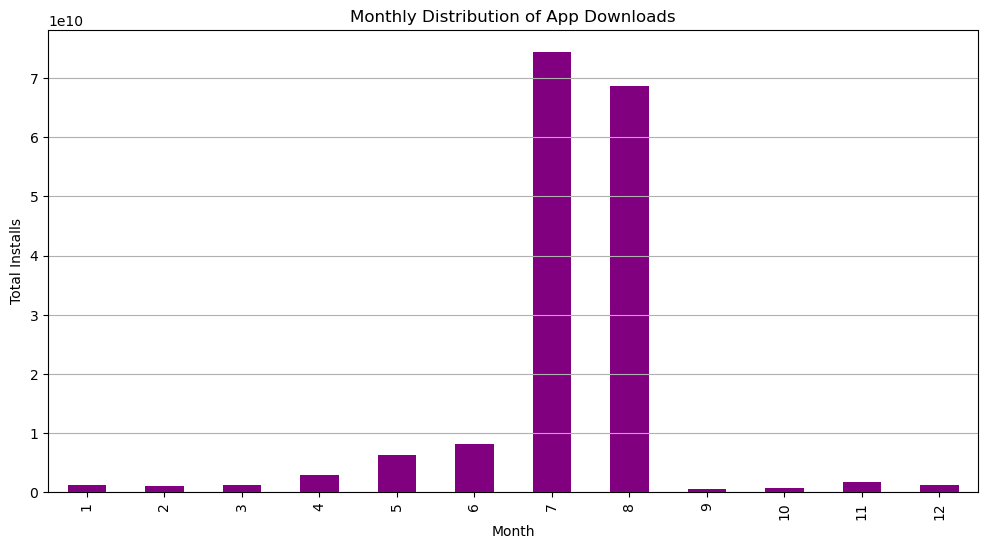

In [5]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
df = pd.read_csv(url)

# Data Cleaning
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce', format='%B %d, %Y')

# Drop rows with invalid date formats
df = df.dropna(subset=['Last Updated'])

# Extract Month and Year
df['Month'] = df['Last Updated'].dt.month
df['Year'] = df['Last Updated'].dt.year


# Data Cleaning
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '').replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')  # Convert to numeric, handling errors

# Downloads Over Time
downloads_over_time = df.groupby(['Year', 'Month'])['Installs'].sum()
downloads_over_time.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('App Downloads Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Total Installs')
plt.grid(True)
plt.show()

# Ratings Over Time
ratings_over_time = df.groupby(['Year', 'Month'])['Rating'].mean()
ratings_over_time.plot(kind='line', marker='o', figsize=(12, 6), color='green')
plt.title('Average Ratings Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


# Seasonal Trends
monthly_downloads = df.groupby('Month')['Installs'].sum()
monthly_downloads.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title('Monthly Distribution of App Downloads')
plt.xlabel('Month')
plt.ylabel('Total Installs')
plt.grid(axis='y')
plt.show()